In [27]:
from genericpath import isfile
import cv2
import matplotlib.pyplot as plt
import shutil
import numpy as np

from sklearn.metrics import accuracy_score
from os import listdir, path, makedirs
from os.path import join, isfile


In [2]:
face_caminho = '../databases/pictures/cropped_faces/'
face_caminho_teste = '../databases/pictures/teste/'
face_caminho_treino = '../databases/pictures/treino/'

if not path.exists(face_caminho):
    makedirs(face_caminho)

if not path.exists(face_caminho_teste):
    makedirs(face_caminho_teste)

if not path.exists(face_caminho_treino):
    makedirs(face_caminho_treino)


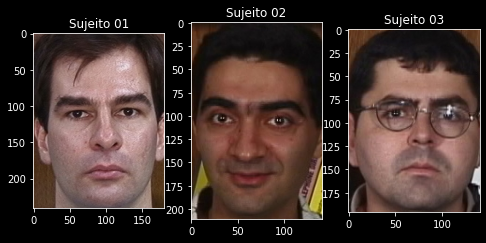

In [3]:
imagem_face_1 = cv2.imread(face_caminho + 's01_01.jpg')
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_RGB2BGR)

imagem_face_2 = cv2.imread(face_caminho + 's02_01.jpg')
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_RGB2BGR)

imagem_face_3 = cv2.imread(face_caminho + 's03_01.jpg')
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(8, 8))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)

plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)

plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()


In [4]:
print("image 1 ==> {}".format(imagem_face_1.shape))
print("image 2 ==> {}".format(imagem_face_2.shape))
print("image 3 ==> {}".format(imagem_face_3.shape))


image 1 ==> (241, 181, 3)
image 2 ==> (211, 141, 3)
image 3 ==> (196, 141, 3)


In [5]:
lista_arq_faces = [f for f in listdir(
    face_caminho) if isfile(join(face_caminho, f))]


In [6]:
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]

    if int(numero) <= 10:
        shutil.copyfile(face_caminho + arq, face_caminho_treino + arq)
    else:
        shutil.copyfile(face_caminho + arq, face_caminho_teste + arq)


In [7]:
def padronizar_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagem


In [8]:
list_face_treino = [file for file in listdir(
    face_caminho_treino) if isfile(join(face_caminho_treino + file))]
list_face_teste = [file for file in listdir(
    face_caminho_teste) if isfile(join(face_caminho_teste + file))]


In [9]:
dados_treinamentos, sujeitos = [], []
dados_testes, subjeito_testes = [], []


In [10]:
for i, arq in enumerate(list_face_treino):
    imagem_caminho = face_caminho_treino + arq
    imagem = padronizar_imagem(imagem_caminho)
    dados_treinamentos.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))


In [11]:
for i, arq in enumerate(list_face_teste):
    imagem_caminho = face_caminho_teste + arq
    imagem = padronizar_imagem(imagem_caminho)
    dados_testes.append(imagem)
    sujeito = arq[1:3]
    subjeito_testes.append(int(sujeito))


In [12]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
subjeito_testes = np.asarray(subjeito_testes, dtype=np.int32)


In [13]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()


In [14]:
modelo_eingenfaces.train(dados_treinamentos, sujeitos)


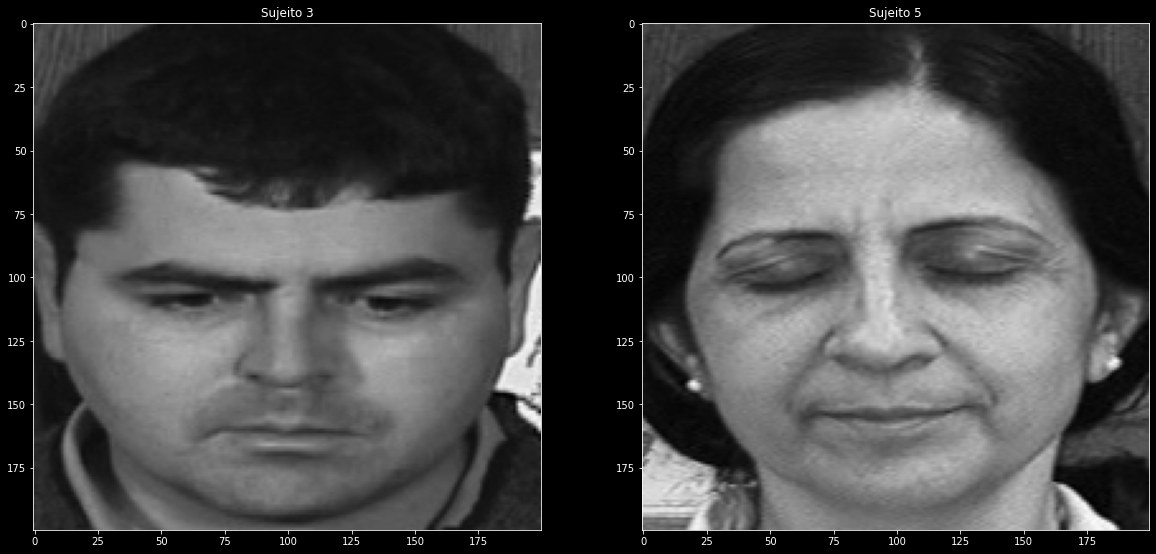

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title("Sujeito " + str(subjeito_testes[13]))
plt.imshow(dados_testes[13], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(subjeito_testes[21]))
plt.imshow(dados_testes[21], cmap="gray")

plt.show()


In [19]:
predicao = modelo_eingenfaces.predict(dados_testes[13])
predicao


(3, 3315.793445085196)

In [17]:
predicao = modelo_eingenfaces.predict(dados_testes[7])
predicao


(2, 3820.568961327711)

In [20]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()


In [21]:
modelo_fisherfaces.train(dados_treinamentos, sujeitos)


In [22]:
predicao_fisherface = modelo_fisherfaces.predict(dados_testes[13])
predicao_fisherface


(3, 891.0556911562242)

In [23]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()


In [24]:
modelo_lbph.train(dados_treinamentos, sujeitos)


In [25]:
predicao_lbph = modelo_lbph.predict(dados_testes[21])
predicao_lbph


(5, 32.938584374874814)

In [37]:
y_pred_eingenfaces, y_pred_fisherfaces, y_pred_lbph = [], [], []


In [38]:
for item in dados_testes:
    y_pred_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

for item in dados_testes:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

for item in dados_testes:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])


In [39]:
acuracia_eingenfaces = accuracy_score(subjeito_testes, y_pred_eingenfaces)
acuracia_fisherfaces = accuracy_score(subjeito_testes, y_pred_fisherfaces)
acuracia_lbph = accuracy_score(subjeito_testes, y_pred_lbph)


In [40]:
print("EingenFaces ==> {}".format(acuracia_eingenfaces))
print("FisherFaces ==> {}".format(acuracia_fisherfaces))
print("LBPH ==> {}".format(acuracia_lbph))


EingenFaces ==> 0.724
FisherFaces ==> 0.52
LBPH ==> 0.792
